In [ ]:

# Creating an API endpoint in the context of a machine learning model allows you to expose your model's predictions to 
# other applications or services. In your case, the Flask application serves as a simple API endpoint that can receive 
# input data, make predictions using the trained model, and return the results. This setup can be useful in various 
# scenarios, such as integrating machine learning models into web applications, mobile apps, or other services.

# Here are some reasons why creating an API endpoint for your model can be beneficial:

#  Separation of Concerns: By having a dedicated API endpoint, the machine learning model becomes a standalone service. 
#  This separation allows you to update or replace the model without affecting the rest of your application.

#  Scalability: If your application grows, and you need to handle more requests or deploy the model on different servers, 
#  having an API makes it easier to scale the machine learning service independently.

#  Integration with Other Systems: An API allows your machine learning model to be integrated into various systems, making 
#  it versatile and usable across different platforms.
        

In [1]:

# Let's load data into a very simple model, train it, and then pickle the model.
# NOTE: this model is saved as 'C:/Users/subfolder/regression_model.py'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd

import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
print(df.columns)
df.head()


X = df[['mpg', 'cyl', 'disp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']]
Y = df['hp']

# train and build a linear regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


# Train a new Random Forest Regressor on the training set
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)


# Save the trained model
joblib.dump(forest_reg, 'C:/Users/subfolder/model.pkl')


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB
None


RandomForestRegressor(random_state=42)

In [ ]:

# Regarding pickling the model after training, it's a way to serialize the trained model and save it to a file. 
# The joblib.dump() function is commonly used for this purpose. There are a few reasons why you might want to pickle 
# your model:

#  Persistence: By saving the trained model to a file, you can load it later without needing to retrain the model every 
#  time your application starts. This is especially important if training the model is a time-consuming process.

#  Deployment: Pickling the model allows you to easily deploy it in production environments or share it with others. You 
#  can load the model in different environments (e.g., on a web server) and use it for making predictions without the need 
#  for the original training code.

#  Consistency: It ensures that the model used for making predictions in your application is the same as the one used 
#  during training. This is crucial for reproducibility and consistency in your machine learning workflow.

# Keep in mind that while pickling is a common approach, there are other serialization methods and model deployment strategies.


In [3]:

# Now, we need to an app to run the process.
# NOTE: this file is saved as 'C:/Users/subfolder/app.py'

from flask import Flask, render_template, request, jsonify
import requests
import os
import joblib  # Add this line for joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Get the path to the current script
current_path = os.path.dirname(os.path.abspath(__file__))

# Specify the template folder path
template_folder = os.path.join(current_path, 'templates')

app = Flask(__name__, template_folder=template_folder)

# Load the trained model
model_path = os.path.join(current_path, 'model.pkl')
forest_reg = joblib.load(model_path)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        input_data_mpg = request.form.get('mpg')
        input_data_mpg = float(input_data_mpg)

        # Assuming your model expects a 2D array as input, reshape the input_data
        input_data = [[input_data_mpg,  # Feature 1
                       # Add placeholders (or real values) for the other 9 features
                       0,  # Feature 2
                       0,  # Feature 3
                       0,  # Feature 4
                       0,  # Feature 5
                       0,  # Feature 6
                       0,  # Feature 7
                       0,  # Feature 8
                       0,  # Feature 9
                       0]]  # Feature 10

        # Use the loaded model for prediction
        prediction = forest_reg.predict(input_data)[0]

        return render_template('result.html', prediction=prediction)

    # For GET requests, render a form or redirect to the home page
    return render_template('index.html')


if __name__ == '__main__':
    app.run(debug=True)
    

In [4]:

# NOTE: this file is saved as 'C:/Users/subfolder/templates/index.html'

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Random Forest Regression Predictor</title>
</head>
<body>
    <h1>Random Forest Regression Predictor</h1>
    <form action="/predict" method="post">
        <label for="mpg">mpg:</label>
        <input type="number" name="mpg" step="0.1" required><br>

        <!-- Add similar input fields for other features -->

        <button type="submit">Predict</button>
    </form>
</body>
</html>


In [5]:

# NOTE: this file is saved as 'C:/Users/subfolder/templates/result.html'

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Result</title>
</head>
<body>
    <h2>Prediction Result:</h2>
    <p>The predicted 'HP' is: {{ prediction }}</p>
    <a href="/">Go back</a>
</body>
</html>


In [ ]:

# Now...we open a new Anaconda Prompt, navigate to the app.py file, and enter this in the Prompt: 'python app.py'
# Enter that without the quotes...


In [6]:

# If you did everything right, you can open a new browser tab and enter this URL: http://localhost:5000/


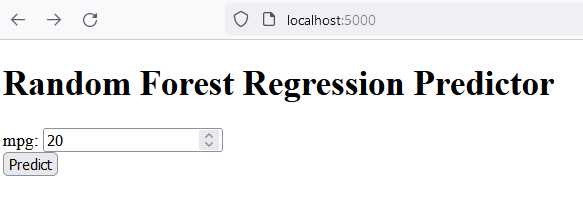

In [7]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\API Endpoint\\"
Image(filename = PATH + "1.JPG")


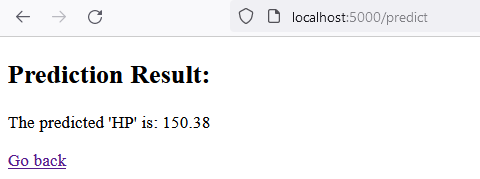

In [8]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\API Endpoint\\"
Image(filename = PATH + "2.JPG")
